<a href="https://colab.research.google.com/github/alfonsoayalapaloma/ml-2024/blob/main/ml_03_classifiers_svc_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> SVC Classifiers

# Solución de un problema de clasificación en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar variables independientes(X) y dependiente(y)]
2.   Partir el dataset en train y test
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clasificación binaria en el dataset Titanic.

1. Análisis del problema


Usted es un ingeniero de Machine Learning y se le pide desarrollar un modelo que determine la supervivencia de un pasajero en el Titanic dada su edad  (Age) y el valor de su ticket (Fare).
Este es un problema de clasificacion y de aprendizaje supervisado, pues se tienen ejemplos marcados con labels supervicencia (survival).

Se puede utilizar un clasificador como SVC. Se usará la accuracy para calificar el modelo.

2. Extraccion del dataset. Limpieza

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows with missing values in 'age' and 'fare' columns to avoid issues with the model
df = titanic.dropna(subset=['age', 'fare'])
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
285,0,3,male,33.0,0,0,8.6625,C,Third,man,True,NaN,Cherbourg,no,True
663,0,3,male,36.0,0,0,7.4958,S,Third,man,True,NaN,Southampton,no,True


3. EDA. Análisis del dataset

In [2]:
target_col = 'survived'
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove(target_col)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(numeric_cols)
print(categorical_cols)


['pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'embarked', 'who', 'embark_town', 'alive']


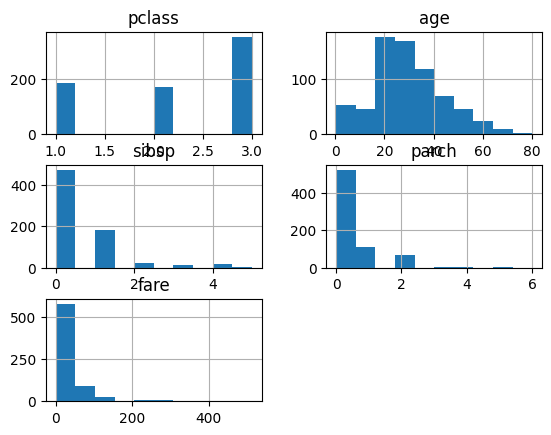

In [3]:
df[numeric_cols].hist();

Text(0, 0.5, 'Value')

<Figure size 1500x1800 with 0 Axes>

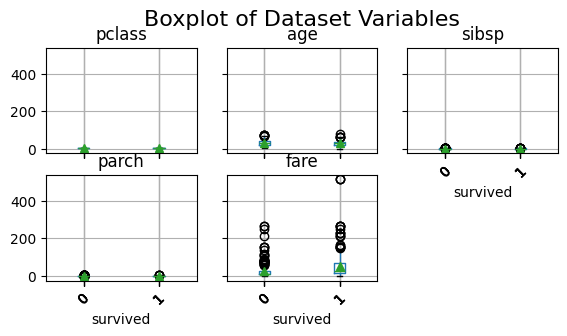

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 18))
df.boxplot(column=numeric_cols,
             by=target_col,
             layout=(3, 3),
             rot=45,
             showmeans=True)

# Set title and labels
plt.suptitle('Boxplot of Dataset Variables', fontsize=16)
plt.xlabel(target_col)
plt.ylabel('Value')

 Responda:
*   Cuantos sobrevivieron?
*   Tasa de supervivencia (Porcentual)
*   Habrá alguno todavia vivo?
*   De que lugar se embarcó la mayoría?
*   Sobrevivieron mas mujeres y niños? (que hombres)
*   Podria Jack haber sobrevivido? Cual sería su probabilidad de supervivencia?

4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [5]:
target_names = df[target_col].unique()
features=['age', 'fare']
# Prepare the features and target
X = df[features]
y = df[target_col]

5. Partir el dataset en train y test

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (571, 2)
X_test (143, 2)
y_train (571,)
y_test (143,)


6. Crear y Entrenar (Ajustar) el modelo.

In [7]:
# Initialize
model = SVC(kernel='linear', random_state=42)

# train the Support Vector Classifier
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

7. Hacer predicciones

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)


8. Calificar el modelo

In [9]:
from sklearn.metrics import classification_report

#Convert to string
target_names = target_names.astype(str)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.95      0.78        87
           1       0.75      0.21      0.33        56

    accuracy                           0.66       143
   macro avg       0.70      0.58      0.55       143
weighted avg       0.69      0.66      0.60       143



Recuerde que:


*   Precision se usa cuando nos importa minimizar Falsos Positivos.
*   Recall se usa cuando nos importa minimizar Falsos Negativos.



### Comparación con un DummyClassifier


In [11]:
### Comparacion con un DummyClassifier
from sklearn.dummy import DummyClassifier
dummy= DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print(dummy.score(X_test, y_test))

dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {dummy_accuracy:.2f}")


0.6083916083916084
Dummy Classifier Accuracy: 0.61


9. Visualizar el resultado

In [ ]:
combined_df =X_test.copy()
combined_df['y_pred'] = y_pred
combined_df['y_test'] = y_test

colors = {0:"red",1:"green"}
combined_df['colors'] = combined_df['y_pred'].map(colors)
combined_df.plot.scatter(x=features[0], y=features[1], color=combined_df['colors']);

In [ ]:
# Plot decision boundaries
h = 0.5  # step size in the mesh
x_min, x_max = X['age'].min() - 5, X['age'].max() + 5
y_min, y_max = X['fare'].min() - 10, X['fare'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X['age'], X['fare'], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Decision Boundary of Titanic Survival Classifier')
plt.show()


10. Elaborar conclusiones

El modelo tiene una accuracy media por lo que se NO acepta como clasificador del dataset.

# EJERCICIO
Seleccione por lo menos cinco features adicionales buscando aumentar el accuracy del modelo. Compare contra un DummyClassifier


1. Análisis del problema. Elección de un modelo.

2. Extracción del dataset. Limpieza.

3. EDA Análisis del dataset

4. Feature engineering.  [ determinar variables independientes(X) y dependiente(y)]

5. partir el dataset en train y test

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Realice el mismo ejercicio con el dataset de IRIS

